<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In this tutorial we will see how to use logistic regression for multiclass classification. 

In [43]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 640x480 with 0 Axes>

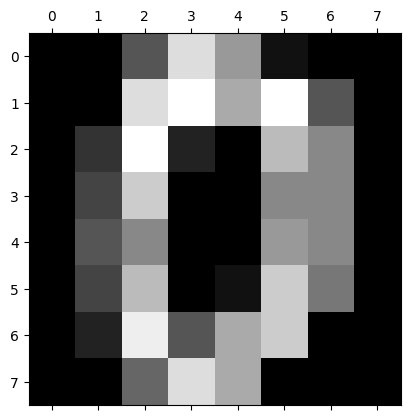

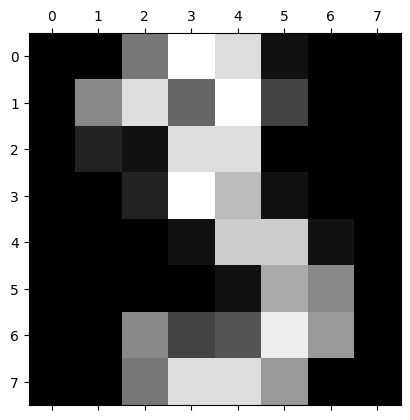

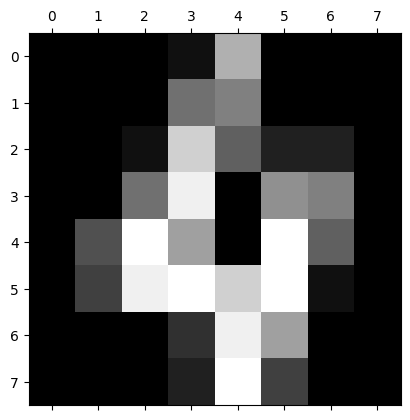

In [44]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [45]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [46]:
digits['images']

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [47]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial',max_iter=1500)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [51]:
X_test.shape

(360, 64)

In [52]:
model.fit(X_train, y_train)

C:\Users\kalyan cherukuri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1500, multi_class='multinomial')

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [53]:
model.score(X_test, y_test)

0.9666666666666667

In [54]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [55]:
y_predicted = model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[33,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 29,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  1,  0],
       [ 1,  0,  0,  0,  0,  3,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 44]])

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

## 